In [1]:
import os
print(os.listdir('C:/Users/ntadi/Pictures'))

['ab', 'assign', 'assignment', 'bhumra', 'bindu', 'Camera Roll', 'chahal', 'chiru', 'desktop.ini', 'dhawan', 'dhoni', 'gayle', 'indu', 'koti', 'narayana', 'Pictures.rar', 'prabhas', 'ragini', 'rana', 'ravi', 'redd', 'rohit', 'sachin', 'samar', 'Saved Pictures', 'siva', 'surya', 'test', 'velu', 'venkey', 'vk']


In [1]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


In [4]:
from keras.preprocessing.image import ImageDataGenerator
#dl libraraies
from tensorflow.python.keras import backend as k
from tensorflow.keras import backend
#from keras import backend as K
from tensorflow_core.python.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

Using TensorFlow backend.


In [5]:
import cv2                  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [6]:
X=[]
Z=[]
IMG_SIZE=32
ab_DIR='C:/Users/ntadi/Pictures/ab'
bhumra_DIR='C:/Users/ntadi/Pictures/bhumra'
bindu_DIR='C:/Users/ntadi/Pictures/bindu'
dhawan_DIR='C:/Users/ntadi/Pictures/dhawan'
chahal_DIR='C:/Users/ntadi/Pictures/chahal'
chiru_DIR='C:/Users/ntadi/Pictures/chiru'
dhoni_DIR='C:/Users/ntadi/Pictures/dhoni'
gayle_DIR='C:/Users/ntadi/Pictures/gayle'
indu_DIR='C:/Users/ntadi/Pictures/indu'
koti_DIR='C:/Users/ntadi/Pictures/koti'
narayana_DIR='C:/Users/ntadi/Pictures/narayana'
prabhas_DIR='C:/Users/ntadi/Pictures/prabhas'
ragini_DIR='C:/Users/ntadi/Pictures/ragini'
rana_DIR='C:/Users/ntadi/Pictures/rana'
ravi_DIR='C:/Users/ntadi/Pictures/ravi'
redd_DIR='C:/Users/ntadi/Pictures/redd'
rohit_DIR='C:/Users/ntadi/Pictures/rohit'
sachin_DIR='C:/Users/ntadi/Pictures/sachin'
samar_DIR='C:/Users/ntadi/Pictures/samar'
siva_DIR='C:/Users/ntadi/Pictures/siva'
surya_DIR='C:/Users/ntadi/Pictures/surya'
velu_DIR='C:/Users/ntadi/Pictures/velu'
venkey_DIR='C:/Users/ntadi/Pictures/venkey'
vk_DIR='C:/Users/ntadi/Pictures/vk'

In [8]:
def assign_label(img,int):
    return int

In [9]:
def make_train_data(person,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,person)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))

In [10]:
make_train_data('ab',ab_DIR)
make_train_data('bhumra',bhumra_DIR)
make_train_data('bindu',bindu_DIR)
make_train_data('dhawan',dhawan_DIR)
make_train_data('chahal',chahal_DIR)
make_train_data('chiru',chiru_DIR)
make_train_data('dhoni',dhoni_DIR)
make_train_data('gayle',gayle_DIR)
make_train_data('indu',indu_DIR)
make_train_data('koti',koti_DIR)
make_train_data('narayana',narayana_DIR)
make_train_data('prabhas',prabhas_DIR)
make_train_data('ragini',ragini_DIR)
make_train_data('rana',rana_DIR)
make_train_data('ravi',ravi_DIR)
make_train_data('redd',redd_DIR)
make_train_data('rohit',rohit_DIR)
make_train_data('sachin',sachin_DIR)
make_train_data('samar',samar_DIR)
make_train_data('siva',siva_DIR)
make_train_data('surya',surya_DIR)
make_train_data('velu',velu_DIR)
make_train_data('venkey',venkey_DIR)
make_train_data('vk',vk_DIR)

print(len(X))

100%|██████████████████████████████████████████████████████████████████████████████| 126/126 [00:00<00:00, 1196.94it/s]


1387


In [27]:
X

array([[[[0.82745098, 0.82352941, 0.76862745],
         [0.64313725, 0.6627451 , 0.60392157],
         [0.94117647, 0.92941176, 0.88627451],
         ...,
         [0.64705882, 0.6745098 , 0.63921569],
         [0.61960784, 0.63137255, 0.62352941],
         [0.56078431, 0.57254902, 0.56470588]],

        [[0.55294118, 0.58823529, 0.52941176],
         [0.4       , 0.51372549, 0.43921569],
         [0.44705882, 0.50980392, 0.45490196],
         ...,
         [0.6       , 0.62745098, 0.59215686],
         [0.56470588, 0.59215686, 0.58039216],
         [0.52156863, 0.54901961, 0.5372549 ]],

        [[0.44313725, 0.51764706, 0.45490196],
         [0.39607843, 0.47843137, 0.41176471],
         [0.29019608, 0.40392157, 0.34117647],
         ...,
         [0.38823529, 0.48627451, 0.43921569],
         [0.51764706, 0.55294118, 0.54117647],
         [0.54901961, 0.58039216, 0.56470588]],

        ...,

        [[0.23137255, 0.30980392, 0.25882353],
         [0.18823529, 0.26666667, 0.21568627]

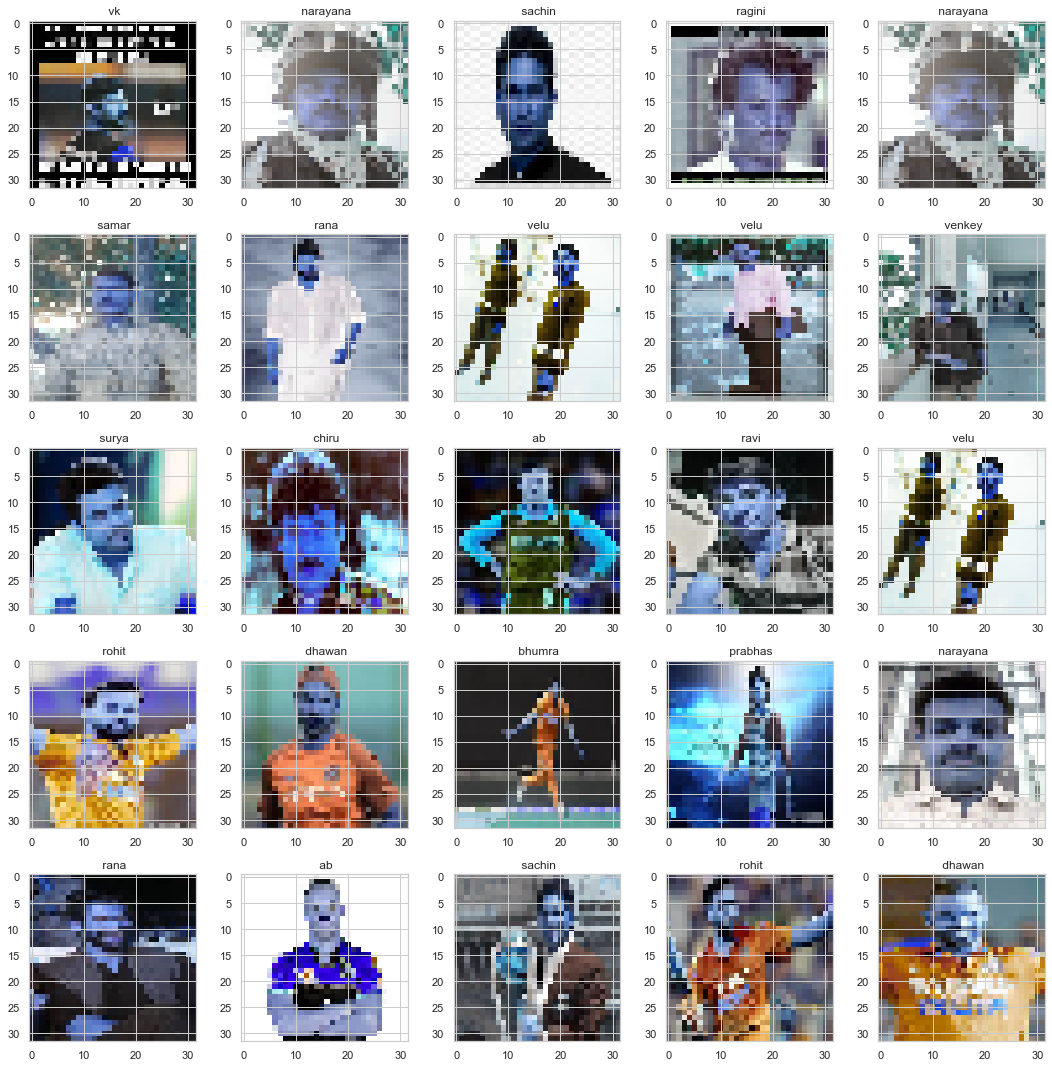

In [11]:
fig,ax=plt.subplots(5,5)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title(' '+Z[l])
        
plt.tight_layout()

In [12]:
le=LabelEncoder()
Y=list(Z)
Y=le.fit_transform(Z)
Y=to_categorical(Y,24)
X=np.array(X)
X=X/255

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Z,test_size=0.25,random_state=42)

In [14]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)


In [21]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(3, activation = "softmax"))

In [22]:
batch_size=32
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [23]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [24]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 96)          55392     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 96)         

In [26]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                             epochs = 50, validation_data = (x_test,y_test), verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

AttributeError: 'str' object has no attribute 'ndim'